# Business Objective 
The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.


# Business Objective
The goal is to automate the salary hike estimation process using a Simple Linear Regression model based on the years of experience of employees. This will help the HR department predict salary increments efficiently and make data-driven decisions.

# Business Constraints
1. Accuracy vs. Interpretability: The model should be simple and interpretable so HR personnel can understand the results easily.
2. Low Error (RMSE): The model should minimize errors in salary hike predictions.
3. Scalability: The model should work well as new data (more employees, changing salary trends) is added.
4. Fairness and Bias: The model should not discriminate against employees based on factors other than experience.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Salary_Data (1).csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Understanding

In [3]:
data.shape

(30, 2)

In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
#correlation coeficient 
correlation=data['YearsExperience'].corr(data['Salary'])
correlation

0.9782416184887599

In [9]:
# ccorrelation coefficient =0.9782  is near to 1 that means YearsExperience and Salary are strongly corrlated to each other

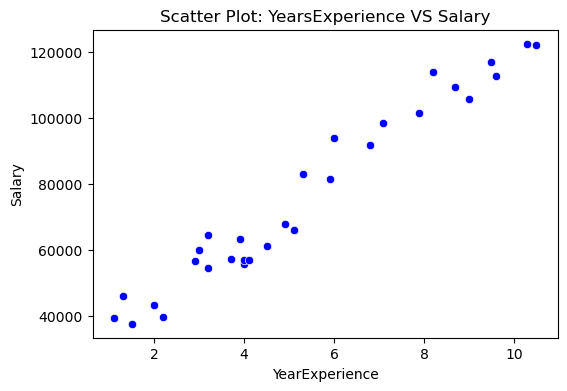

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'],color='Blue')
plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.title('Scatter Plot: YearsExperience VS Salary')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
X=data[['YearsExperience']]
Y=data['Salary']

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [25]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [28]:
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
rmse

7059.04362190151

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
model.fit(data[['YearsExperience']],data['Salary'])

LinearRegression()

In [34]:
from sklearn.metrics import r2_score


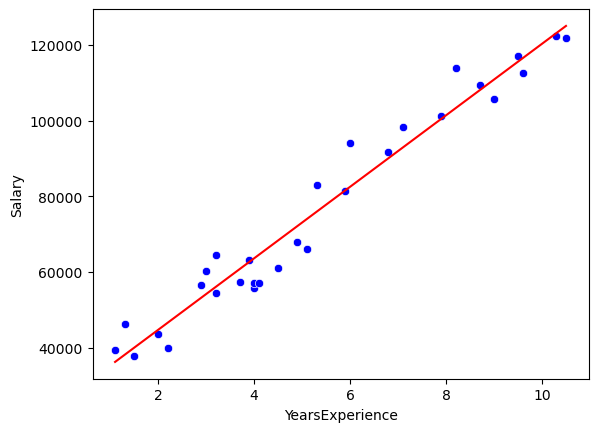

In [35]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'],color='blue')
plt.plot(data['YearsExperience'],model.predict(data[['YearsExperience']]),color='red')

In [38]:
pred1=model.predict(data[['YearsExperience']])

In [39]:
r2_score(data[['Salary']],pred1)

0.9569566641435086

In [43]:
mean_squared_error(data[['Salary']],pred1)

31270951.722280968

In [44]:
data['Log_Salary']=np.log(data['Salary'])

In [45]:
X=data[['YearsExperience']]
Y_log=data['Log_Salary']

In [46]:
X_train,X_test,Y_train_log,Y_test_log=train_test_split(X,Y_log,test_size=0.2,random_state=42)


In [48]:
log_model=LinearRegression()
log_model.fit(X_train,Y_train_log)

LinearRegression()

In [49]:
Y_pred_log=log_model.predict(X_test)
Y_test_log

27    11.631908
15    11.126351
23    11.642303
17    11.327656
8     11.073567
9     10.954117
Name: Log_Salary, dtype: float64

In [52]:
Y_pred_original_scale=np.exp(Y_pred_log)

In [54]:
rmse_log = np.sqrt(mean_squared_error(data["Salary"].loc[Y_test_log.index], Y_pred_original_scale))
rmse_log

9215.847672114533

In [55]:
from sklearn.metrics import r2_score

NameError: name 'Y_test' is not defined